### Outlier Detection using Perecentile Method | Winsorization

In [90]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [91]:
df=pd.read_csv('weight-height.csv')

In [92]:
df.shape

(10000, 3)

In [93]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


<Axes: xlabel='Weight'>

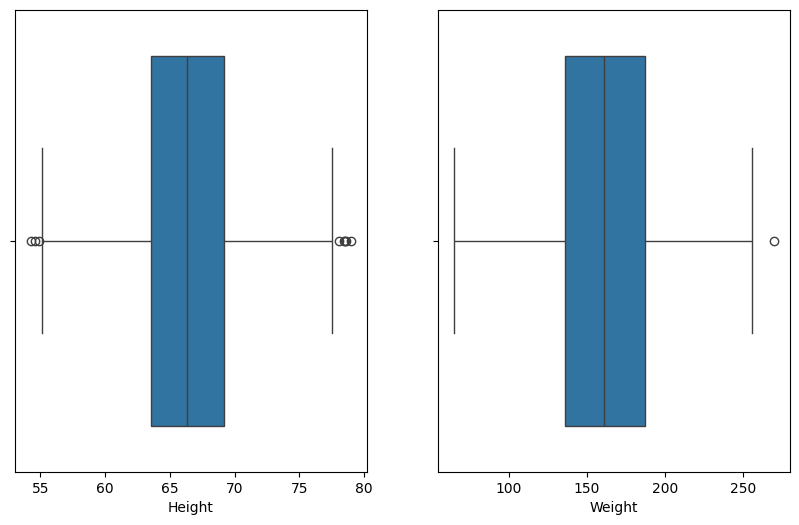

In [94]:
plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)
sns.boxplot(x=df['Height'])
plt.subplot(1,2,2)
sns.boxplot(x=df['Weight'])

- not any potential outliers in the weight so working on height column for now 

In [95]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

C:\Users\sanga\AppData\Local\Temp\ipykernel_14436\2626930328.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Height'], shade=True)


<Axes: xlabel='Height', ylabel='Density'>

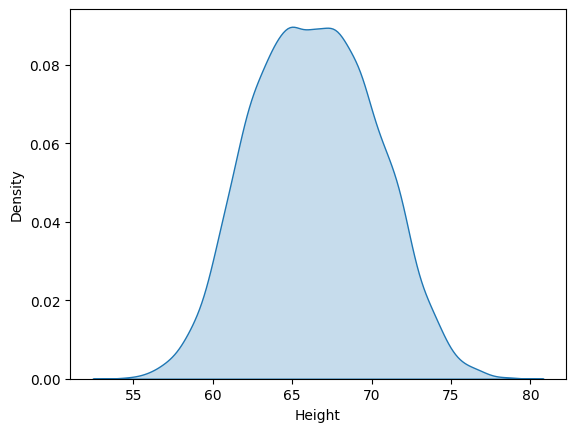

In [96]:
sns.kdeplot(df['Height'], shade=True)

In [97]:
upper_limit=df['Height'].quantile(0.99)
upper_limit

74.7857900583366

In [98]:
lower_limit=df['Height'].quantile(0.01)
lower_limit

58.13441158671655

In [99]:
df[(df['Height'] > upper_limit)| (df['Height']< lower_limit) ]

,Gender,Height,Weight
23,Male,75.205974,228.761781
190,Male,76.709835,235.035419
197,Male,75.944460,231.924749
202,Male,75.140821,224.124271
215,Male,74.795375,232.635403
...,...,...,...
9761,Female,56.975279,90.341784
9825,Female,55.979198,85.417534
9895,Female,57.740192,93.652957
9904,Female,57.028857,101.202551


### Trimming

In [100]:
new_df=df[(df['Height']<upper_limit) & (df['Height']>lower_limit)]

In [101]:
new_df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


C:\Users\sanga\AppData\Local\Temp\ipykernel_14436\121989505.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(new_df['Height'],shade=True)


<Axes: xlabel='Height'>

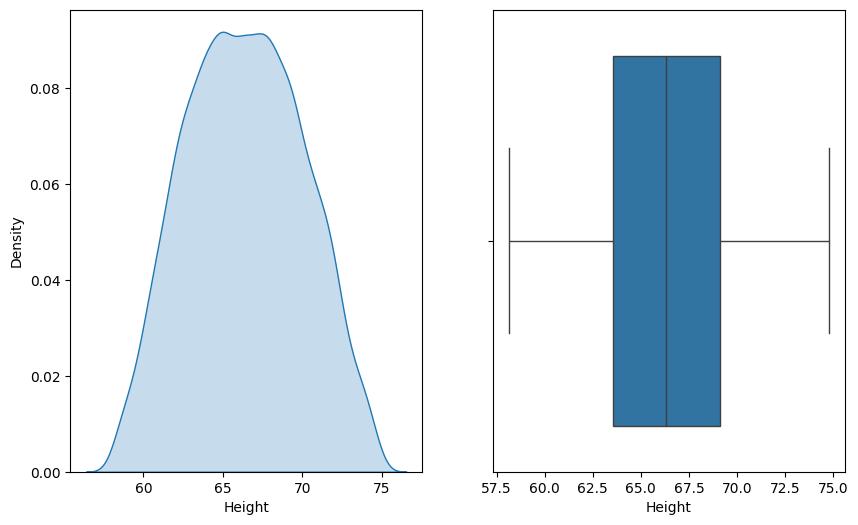

In [102]:
plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)
sns.kdeplot(new_df['Height'],shade=True)

plt.subplot(1,2,2)
sns.boxplot(x=new_df['Height'])

### winsorization 

In [103]:
df['Height_winsorized']=np.where(df['Height']>upper_limit,upper_limit,np.where(df['Height']<lower_limit,lower_limit,df['Height']))

In [104]:
df

,Gender,Height,Weight,Height_winsorized
0,Male,73.847017,241.893563,73.847017
1,Male,68.781904,162.310473,68.781904
2,Male,74.110105,212.740856,74.110105
3,Male,71.730978,220.042470,71.730978
4,Male,69.881796,206.349801,69.881796
...,...,...,...,...
9995,Female,66.172652,136.777454,66.172652
9996,Female,67.067155,170.867906,67.067155
9997,Female,63.867992,128.475319,63.867992
9998,Female,69.034243,163.852461,69.034243


C:\Users\sanga\AppData\Local\Temp\ipykernel_14436\3551705292.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Height_winsorized'],shade=True)


<Axes: xlabel='Height_winsorized'>

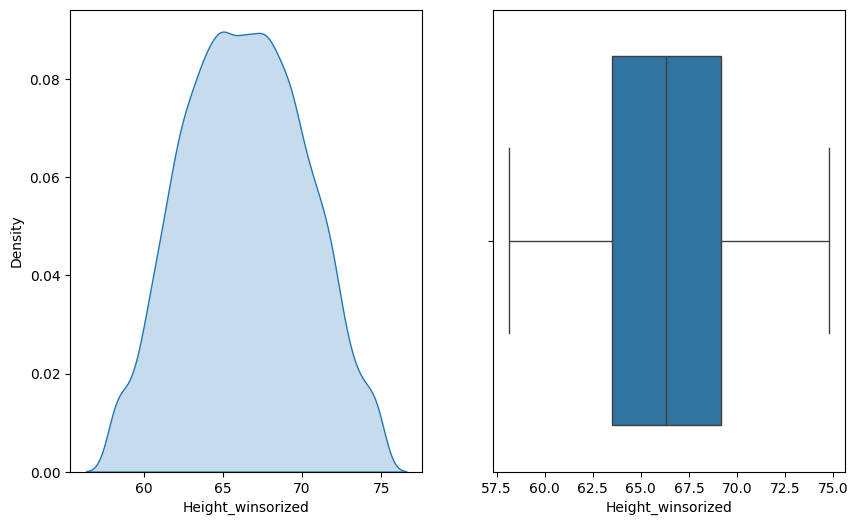

In [107]:
plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)
sns.kdeplot(df['Height_winsorized'],shade=True)
plt.subplot(1,2,2)
sns.boxplot(x=df['Height_winsorized'])